# Employment DataBase

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [3]:
def connect_to_db():
    connection = psycopg2.connect(user="postgres",
                                 password='Spvali@12345',
                                 host = 'localhost',
                                 port=5432,
                                 database="Employee_DB")
    return connection
connection = connect_to_db()

# 1.Checking count of all the tables in DataBase

In [4]:
department_name = pd.read_sql_query("select * from employees.department",connection)
department_name

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:
department_employee = pd.read_sql_query("select * from employees.department_employee",connection)
department_employee.head()

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [6]:
department_manager = pd.read_sql_query("select * from employees.department_manager",connection)
department_manager.head()

,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21


In [7]:
employee = pd.read_sql_query("select * from employees.employee",connection)
employee.head()

,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [8]:
salary = pd.read_sql_query("select * from employees.salary",connection)
salary.head()

,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [9]:
Title= pd.read_sql_query("select * from employees.title",connection)
Title

,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [10]:
print(department_name.shape)
print(department_employee.shape)
print(department_manager.shape)
print(employee.shape)
print(salary.shape)
print(Title.shape)


(9, 2)
(331603, 4)
(24, 4)
(300024, 6)
(1141783, 4)
(443308, 4)


# 2. Which department has the highest average salary of active employees

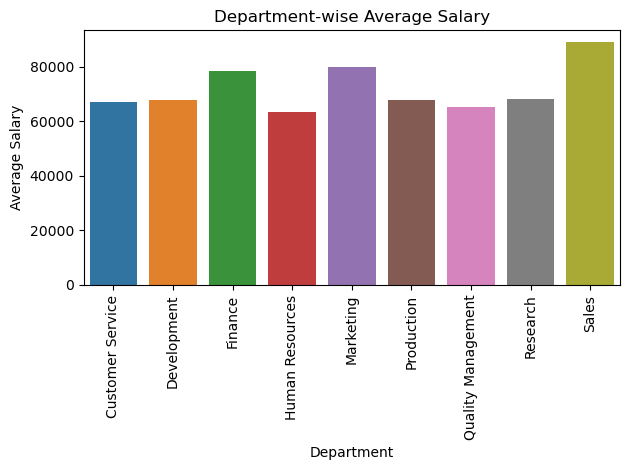

In [64]:
query = """select dept_name ,avg(amount)as avg_salary
                from employees.department_employee
                JOIN
                employees.salary ON employees.salary.employee_id = employees.department_employee.employee_id
                JOIN
                    employees.department ON employees.department.id = employees.department_employee.department_id
                where extract(year from salary.to_date) = 9999
                group by dept_name;"""


connection = connect_to_db()
average_salary_of_department = pd.read_sql_query(query,connection)
average_salary_of_department.head()

sns.barplot(data = average_salary_of_department,x = "dept_name",y = "avg_salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Department-wise Average Salary")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

#  3.Which title has the highest avg salary? Give some plots to show the avg salary title-wise

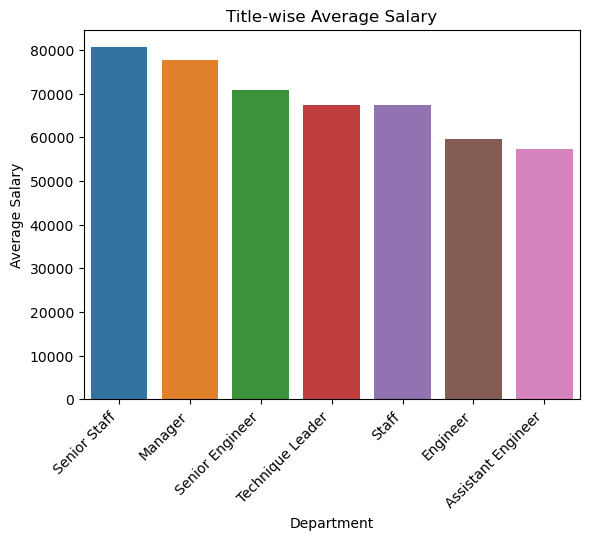

In [10]:
query = """select t.title,avg(s.amount) as avg_salary
           from employees.title t
           left join employees.employee e on t.employee_id = e.id
           left join employees.salary s on s.employee_id = e.id
           where date_part('year',s.to_date) = 9999
           and  date_part('year',t.to_date) = 9999
           group by t.title
           order by avg_salary DESC;"""

connection = connect_to_db()
title_wise_average_salary = pd.read_sql_query(query,connection)
#print(title_wise_average_salary)
#df = pd.read_sql_query(query, connection)
sns.barplot(data=title_wise_average_salary,x='title',y='avg_salary')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Title-wise Average Salary')
plt.xticks(rotation=45,ha='right')
plt.show()

# 4.Distribution of salary across Titles

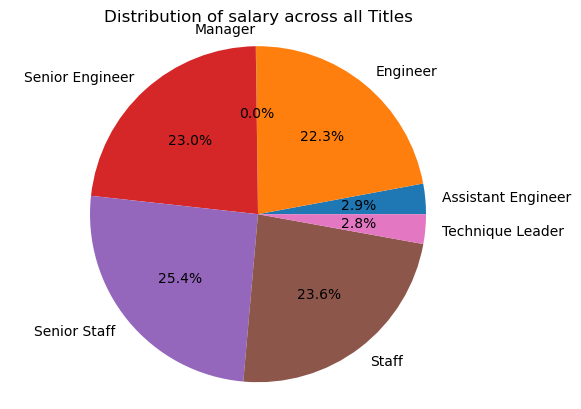

In [11]:
query = """select title, sum(amount) as amount from employees.title
            INNER JOIN employees.salary 
            on employees.title.employee_id = employees.salary.employee_id
            GROUP BY title"""
connection = connect_to_db()

distribution_of_salary_across_titles = pd.read_sql_query(query,connection)
distribution_of_salary_across_titles

plt.pie(distribution_of_salary_across_titles['amount'],labels=distribution_of_salary_across_titles['title'],autopct='%1.1f%%')
plt.title('Distribution of salary across all Titles')
plt.axis('equal')
plt.show()

# 5.Distribution of salary across departments

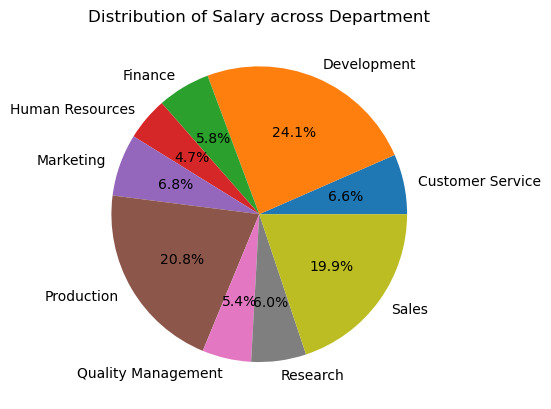

In [12]:
query = """select dept_name, sum(amount) as amount 
           from employees.department_employee
           INNER JOIN employees.salary
           on employees.department_employee.employee_id = employees.salary.employee_id
           INNER JOIN employees.department
           on employees.department.id = employees.department_employee.department_id
           GROUP BY dept_name
        """

connection = connect_to_db()
distribution_of_salary_across_departments = pd.read_sql_query(query,connection)
plt.pie(distribution_of_salary_across_departments['amount'],labels=distribution_of_salary_across_departments['dept_name'],autopct='%1.1f%%')
plt.title('Distribution of Salary across Department')
plt.show()

# 6. How many active managers in each department. Is there any department with no manager?

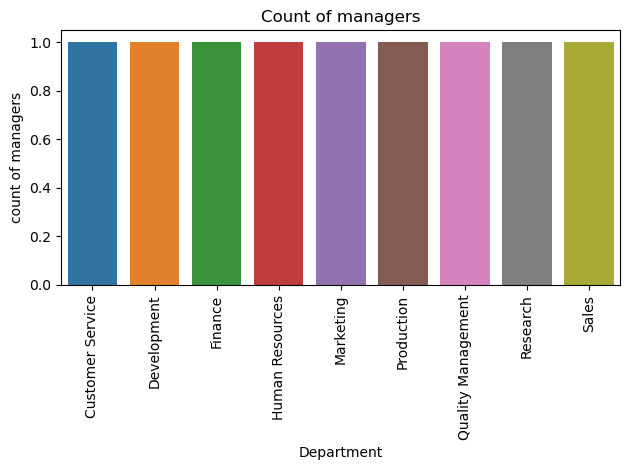

In [13]:
query = """select dept_name, count(employee_id) as count from employees.department_manager
           right join employees.department 
           on employees.department_manager.department_id = employees.department.id
           where extract(year from department_manager.to_date) = 9999
           group by dept_name"""

connection = connect_to_db()
active_managers_in_department = pd.read_sql_query(query,connection)
#active_managers_in_department

sns.countplot(data = active_managers_in_department,x = "dept_name")
plt.xlabel("Department")
plt.ylabel("count of managers")
plt.title("Count of managers")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# 7. Composition of titles department-wise. Appropriate plots.

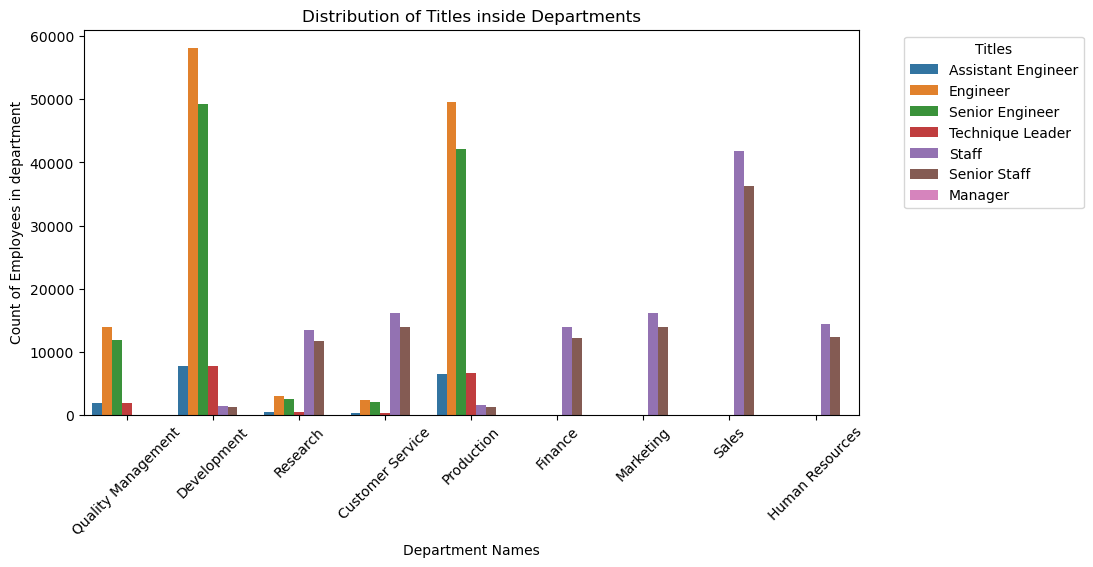

In [14]:
query = """
SELECT
    employees.department.dept_name as dept_name,
    employees.title.title as title,
    count(employees.employee.id) as count
FROM
    employees.employee
LEFT JOIN
    employees.title ON employees.title.employee_id = employees.employee.id
LEFT JOIN
    employees.department_employee ON employees.department_employee.employee_id = employees.employee.id
LEFT JOIN
    employees.department ON employees.department.id = employees.department_employee.department_id
GROUP BY
    employees.department.dept_name, employees.title.title
"""

connection = connect_to_db()
composition_of_title_dept_wise = pd.read_sql_query(query, connection)
composition_of_title_dept_wise

plt.figure(figsize=(10,5))
sns.barplot(x='dept_name',y='count',hue='title',data=composition_of_title_dept_wise)
plt.title("Distribution of Titles inside Departments")
plt.xlabel('Department Names')
plt.ylabel('Count of Employees in department')
plt.xticks(rotation=45)
plt.legend(title='Titles',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

# 8. Composition of departments title-wise. Appropriate plots.

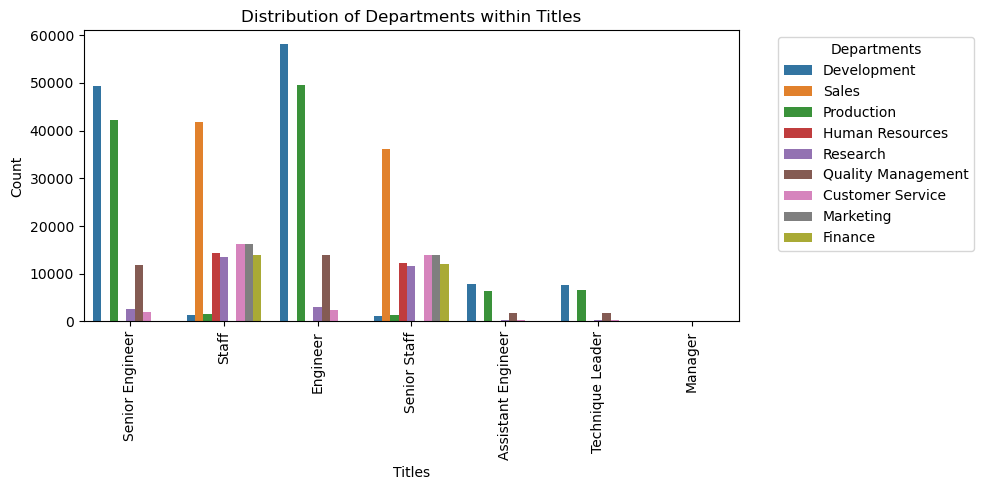

In [15]:
query = """
SELECT
    employees.title.title as title,
    employees.department.dept_name as dept_name
FROM
    employees.employee
LEFT JOIN
    employees.title ON employees.title.employee_id = employees.employee.id
LEFT JOIN
    employees.department_employee ON employees.department_employee.employee_id = employees.employee.id
LEFT JOIN
    employees.department ON employees.department.id = employees.department_employee.department_id
"""

connection = connect_to_db()
composition_of_dept_title_wise = pd.read_sql_query(query, connection)
#connection.close()  

plt.figure(figsize=(10, 5))
sns.countplot(x='title', hue='dept_name', data=composition_of_dept_title_wise)
plt.title('Distribution of Departments within Titles')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Departments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 9. Salaries of active department managers. Which department's manager who is active earns the most?

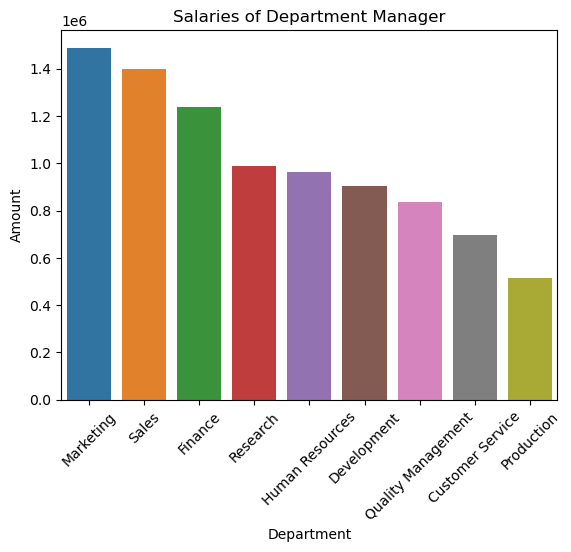

In [16]:
query = """select dept_name, sum(amount) as amount
           from employees.department_manager
           inner join employees.salary 
           ON employees.department_manager.employee_id = employees.salary.employee_id
           INNER JOIN employees.department 
           ON employees.department.id = employees.department_manager.department_id
           where extract(year from department_manager.to_date) = 9999
           GROUP BY dept_name
           ORDER BY amount DESC
           """

connection = connect_to_db()
active_dept_manager = pd.read_sql_query(query,connection)
active_dept_manager
sns.barplot(data=active_dept_manager,x='dept_name',y='amount')
plt.xlabel("Department")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.title("Salaries of Department Manager")
plt.show()

# What are the titles of active department managers? Are they managers only?

In [20]:
query = '''select title from employees.title 
           inner join employees.department_manager
           on employees.title.employee_id = employees.department_manager.employee_id
           where extract(year from department_manager.to_date) = 9999;
'''
connection = connect_to_db()
title_of_active_department_manager = pd.read_sql_query(query,connection)
title_of_active_department_manager

,title
0,Manager
1,Senior Staff
2,Manager
3,Senior Staff
4,Manager
5,Senior Staff
6,Manager
7,Senior Engineer
8,Manager
9,Technique Leader


# 11. Past history of salaries of managers across department (yearly)

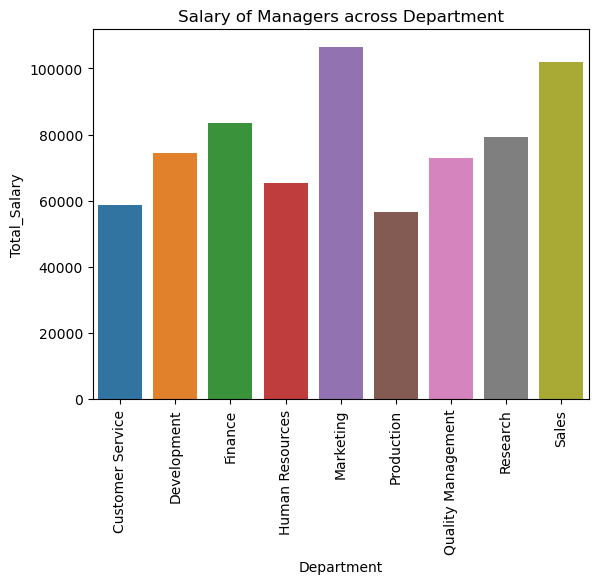

In [34]:
query = """select 
            employees.department.dept_name,
            sum(employees.salary.amount) as total_salary
            from 
                employees.department_manager
            INNER JOIN 
                employees.salary ON employees.department_manager.employee_id  = employees.salary.employee_id
            INNER JOIN 
                employees.department ON employees.department.id = employees.department_manager.department_id
            WHERE 
                EXTRACT(year FROM employees.department_manager.to_date) = 9999
                AND EXTRACT(year FROM employees.salary.to_date) = 9999
            GROUP BY 
                employees.department.dept_name

            """
connection = connect_to_db()
salary_of_manager_across_department = pd.read_sql_query(query,connection)
sns.barplot(data=salary_of_manager_across_department,x='dept_name',y='total_salary')
plt.xlabel("Department")
plt.ylabel("Total_Salary")
plt.title("Salary of Managers across Department")
plt.xticks(rotation=90)
plt.show()

# 12. Average number of years employees work in the company before leaving (title wise)

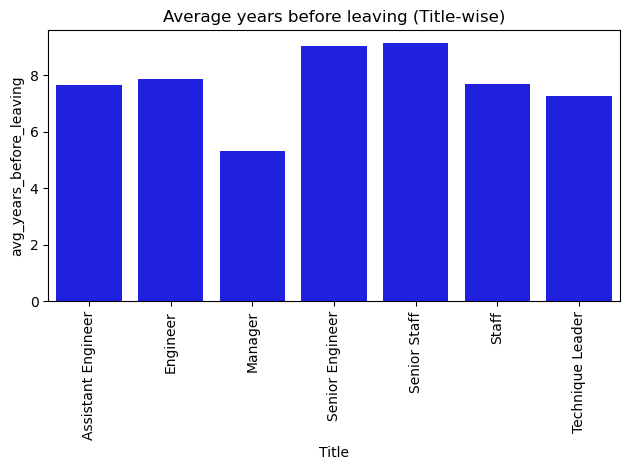

In [47]:
query = """SELECT employees.title.title, 
           AVG(EXTRACT(YEAR FROM employees.title.to_date) - EXTRACT(YEAR FROM employees.employee.hire_date))
           FROM employees.employee
           LEFT JOIN employees.title ON employees.title.employee_id = employees.employee.id
           WHERE date_part('YEAR',employees.title.to_date) != 9999
           GROUP BY employees.title.title
           
"""

connection = connect_to_db()
employees_average_working_years = pd.read_sql_query(query,connection)


sns.barplot(data =employees_average_working_years, x='title', y='avg', color='blue')
plt.xlabel("Title")
plt.ylabel("avg_years_before_leaving")
plt.title("Average years before leaving (Title-wise)")
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

# 13.Average number of years employees work in the company before leaving (Dept wise)

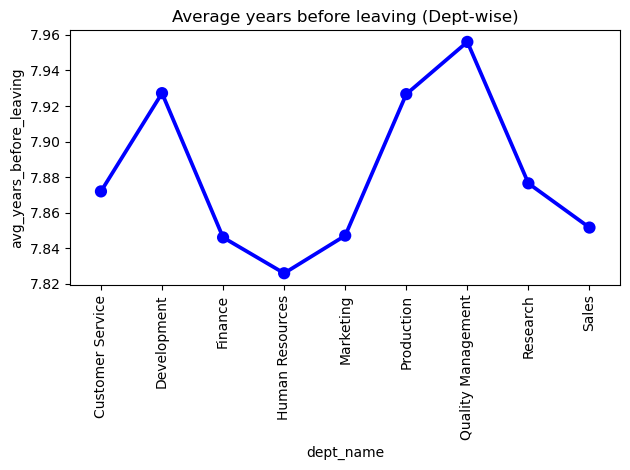

In [57]:
query = '''SELECT 
           employees.department.dept_name,
           AVG(EXTRACT(YEAR FROM employees.title.to_date) - EXTRACT(YEAR FROM employees.employee.hire_date))
           FROM
           employees.employee
           LEFT JOIN
           employees.title on employees.title.employee_id = employees.employee.id
           LEFT JOIN
           employees.department_employee on employees.department_employee.employee_id = employees.employee.id
           LEFT JOIN 
           employees.department ON employees.department.id = employees.department_employee.department_id
           WHERE
           date_part('year',employees.title.to_date) != 9999
           GROUP BY
           employees.department.dept_name
'''


connection = connect_to_db()
employees_average_working_years = pd.read_sql_query(query,connection)
employees_average_working_years

sns.pointplot(data =employees_average_working_years, x='dept_name', y='avg', color='blue')
plt.xlabel("dept_name")
plt.ylabel("avg_years_before_leaving")
plt.title("Average years before leaving (Dept-wise)")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# 15. Median annual salary increment department wise.

In [58]:
query = """SELECT
    dept_name as dept_name,
    salary.amount as salary
FROM
    employees.department_employee
JOIN
    employees.salary ON employees.department_employee.employee_id = employees.salary.employee_id
JOIN
    employees.department ON employees.department_employee.department_id = employees.department.id;

"""
connection = connect_to_db()
hh = pd.read_sql_query(query,connection)
hh

,dept_name,salary
0,Human Resources,78228
1,Human Resources,82621
2,Human Resources,83735
3,Human Resources,85572
4,Human Resources,85076
...,...,...
1261685,Quality Management,59311
1261686,Quality Management,61380
1261687,Quality Management,65109
1261688,Quality Management,67262


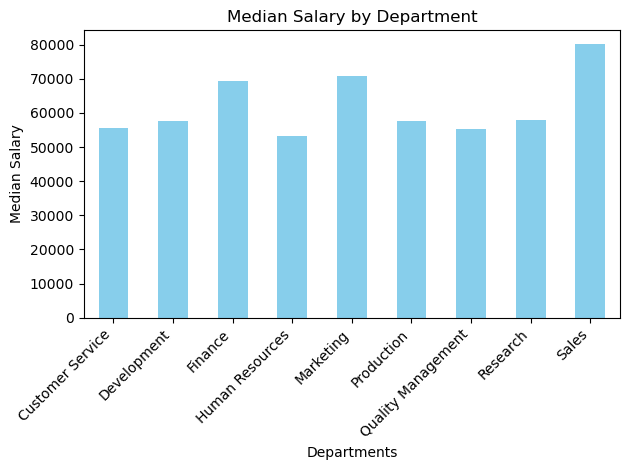

In [60]:
query = """SELECT
            dept_name as dept_name,
            salary.amount as salary
        FROM
            employees.department_employee
        JOIN
            employees.salary ON employees.department_employee.employee_id = employees.salary.employee_id
        JOIN
            employees.department ON employees.department_employee.department_id = employees.department.id
          """

connection = connect_to_db()
median_annual_salary = pd.read_sql_query(query,connection)
#connection.close()  

median_salary = median_annual_salary.groupby("dept_name")["salary"].median()
median_salary.plot(kind = "bar",color='skyblue')
plt.title('Median Salary by Department')
plt.xlabel('Departments')
plt.ylabel('Median Salary')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()